dof: 7
Fourier order: 6
Base frequency: 0.18


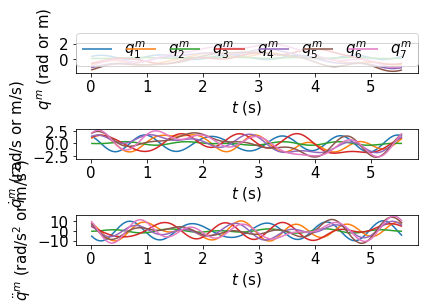

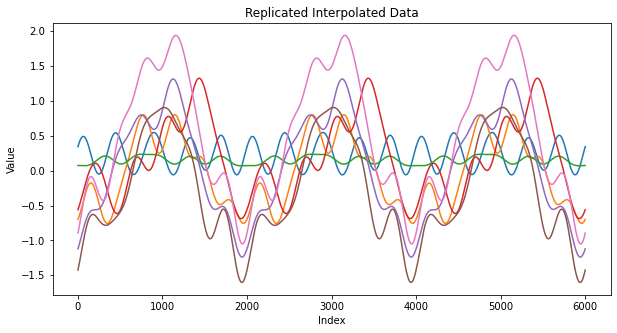

In [1]:
import numpy as np
import sympy
from robot_def import RobotDef
from kinematics.geometry import Geometry
from dynamics.dynamics import Dynamics
from trajectory_optimization import TrajOptimizer
from trajectory_optimization import TrajPlotter
from utils import new_sym
from utils import save_data, load_data

import matplotlib.pyplot as plt

# Names as Arguments
model_name = 'psm_simplified'
save_name = 'psm_test_simplified'

training_trajectory_name = 'one'
training_trajectory_name_ = 'psm_simplified'

# model_folder = 'data/' + model_name + '/model/'
model_folder = 'data/' + save_name + '/model/'
robot_model = load_data(model_folder,training_trajectory_name_) 


# trajectory_folder = 'data/' + model_name +'/optimal_trajectory/'
trajectory_folder = 'data/' + save_name +'/optimal_trajectory/'
dof, fourier_order, base_freq, traj_optimizer_result, reg_norm_mat = load_data(trajectory_folder,
                                                                          training_trajectory_name)

print("dof: {}".format(dof))
print("Fourier order: {}".format(fourier_order))
print("Base frequency: {}".format(base_freq))

from trajectory_optimization import FourierTraj
fourier_traj_train = FourierTraj(dof, fourier_order, base_freq, sample_num_per_period=20)
traj_plotter_train = TrajPlotter(fourier_traj_train, coordinates=robot_model.coordinates)
traj_plotter_train.plot_desired_traj(traj_optimizer_result)

import cloudpickle

# with open('data/psm_test/optimal_trajectory/one.pkl', "rb") as input_file:
#     a = cloudpickle.load(input_file)

# import json
# 
# with open('excute_run/three_wpi_traj.json', "rb") as input_file:
#     e = json.load(input_file)


from scipy.interpolate import interp1d
import json

# Assuming your array is named 'data'
data = fourier_traj_train.q  # Your (141, 7) ndarray

# Generate x values for interpolation
x = np.arange(data.shape[0])

# Interpolate along each column
interpolated_data = np.zeros((2000, data.shape[1]))
for i in range(data.shape[1]):
    f = interp1d(x, data[:, i], kind='cubic')
    interpolated_data[:, i] = f(np.linspace(0, x[-1], 2000))

# Convert ndarray to nested lists
interpolated_data_as_list = interpolated_data.tolist()


# Repeat the list 3 times in sequence
repeated_data = interpolated_data_as_list * 3

# Plot replicated data
plt.figure(figsize=(10, 5))
plt.plot(repeated_data)
plt.title('Replicated Interpolated Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Create a dictionary for JSON
json_data = {'js': repeated_data}

# Save to JSON file
with open('interp_traj_1_psm_simp_test.json', 'w') as json_file:
    json.dump(json_data, json_file)

    
    
# # Plot original data
# plt.figure(figsize=(10, 5))
# plt.subplot(2, 1, 1)
# plt.plot(x, data)
# plt.title('Original Data')
# plt.xlabel('Index')
# plt.ylabel('Value')
# 
# # Plot interpolated data from JSON
# interpolated_data_from_json = np.array(json_data['js'])
# x_interpolated = np.linspace(0, x[-1], 2000)
# plt.subplot(2, 1, 2)
# plt.plot(x_interpolated, interpolated_data_from_json)
# plt.title('Interpolated Data from JSON')
# plt.xlabel('Index')
# plt.ylabel('Value')
# 
# plt.tight_layout()
# plt.show()

a = 1 
